In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('covid_dataset/us-covid19/vaccinations/us_state_vaccinations.csv')
data.head(2)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN


In [66]:
nc_data = data[data['location']=='North Carolina']

In [67]:
nc_data.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')

In [68]:
nc_data = nc_data.fillna(0)

<function matplotlib.pyplot.show(close=None, block=None)>

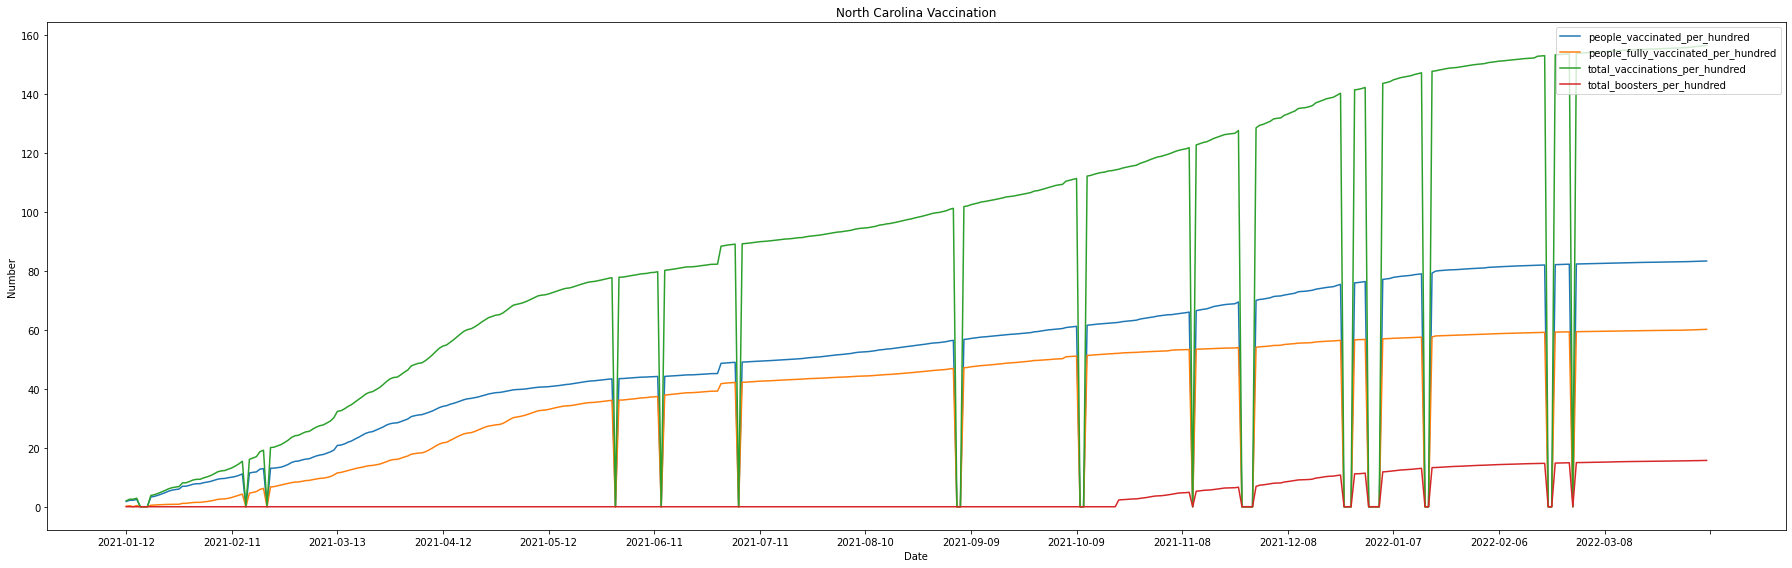

In [69]:
daily_vaccine = nc_data.loc[0:,'people_vaccinated_per_hundred'].values
daily_vaccine_full = nc_data.loc[0:,'people_fully_vaccinated_per_hundred'].values
total_vaccine = nc_data.loc[0:,'total_vaccinations_per_hundred'].values
total_booster = nc_data.loc[0:,'total_boosters_per_hundred'].values
dates = nc_data.loc[0:,'date'].values

plt.figure(figsize=(25,8))
plt.plot(dates,daily_vaccine, label= 'people_vaccinated_per_hundred')
plt.plot(dates,daily_vaccine_full, label= 'people_fully_vaccinated_per_hundred')
plt.plot(total_vaccine, label= 'total_vaccinations_per_hundred')
plt.plot(total_booster, label= 'total_boosters_per_hundred')
plt.xticks(np.arange(0, len(dates)+1, 30))
plt.title('North Carolina Vaccination')
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/vaccine/nc_vaccine_all.pdf')
plt.show

In [48]:
us_data = pd.read_csv('covid_dataset/us-covid19/vaccinations/country_data/United States.csv')
us_data.head(2)

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,United States,2020-12-13,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,31063,25783,6228,0
1,United States,2020-12-14,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,35646,30205,6348,0


<function matplotlib.pyplot.show(close=None, block=None)>

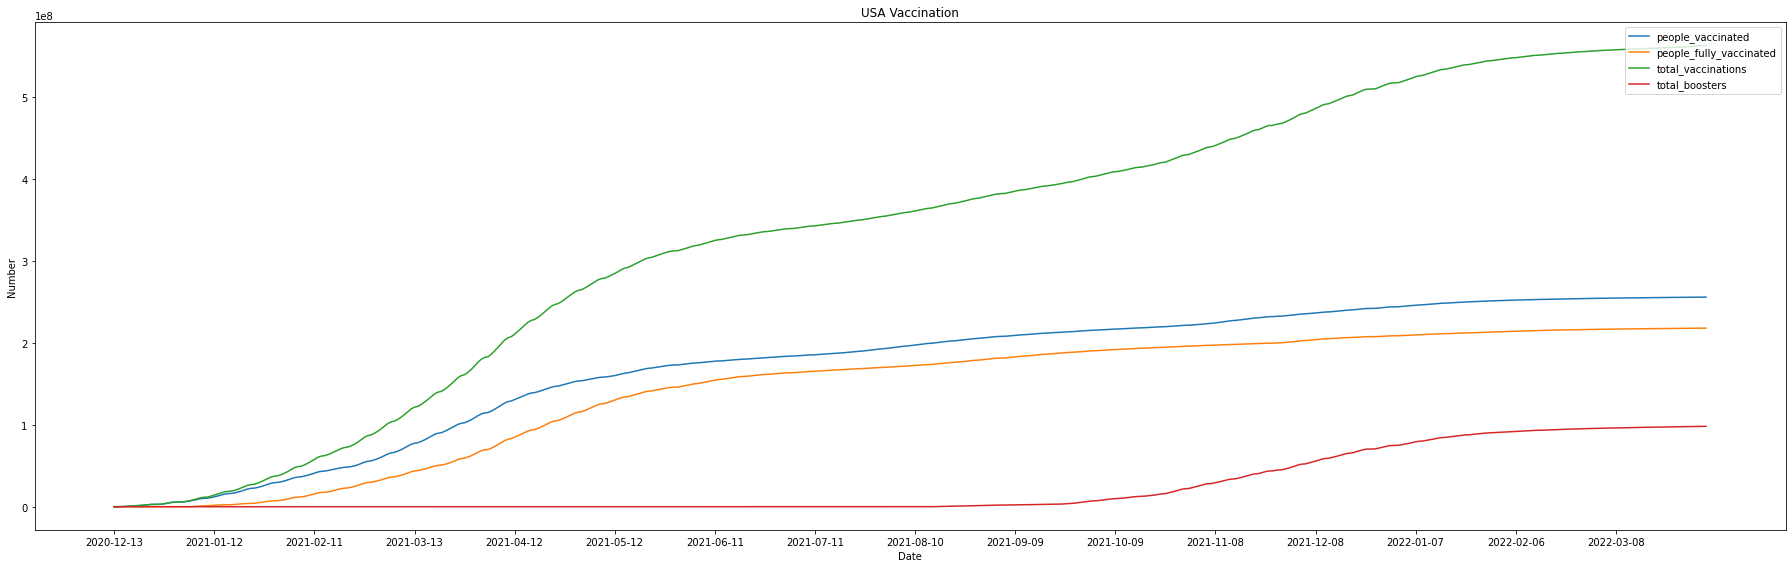

In [49]:
daily_vaccine = us_data.loc[0:,'people_vaccinated'].values
daily_vaccine_full = us_data.loc[0:,'people_fully_vaccinated'].values
total_vaccine = us_data.loc[0:,'total_vaccinations'].values
total_booster = us_data.loc[0:,'total_boosters'].values
dates = us_data.loc[0:,'date'].values

plt.figure(figsize=(25,8))
plt.plot(dates,daily_vaccine, label= 'people_vaccinated')
plt.plot(dates,daily_vaccine_full, label= 'people_fully_vaccinated')
plt.plot(total_vaccine, label= 'total_vaccinations')
plt.plot(total_booster, label= 'total_boosters')
plt.xticks(np.arange(0, len(dates)+1, 30))
plt.title('USA Vaccination')
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/vaccine/usa_vaccine_all.pdf')
plt.show

In [51]:
sc_data = data[data['location']=='South Carolina']

In [52]:
nc_daily_vac = nc_data.loc[:,'daily_vaccinations'].values
sc_daily_vac = sc_data.loc[:,'daily_vaccinations'].values

<function matplotlib.pyplot.show(close=None, block=None)>

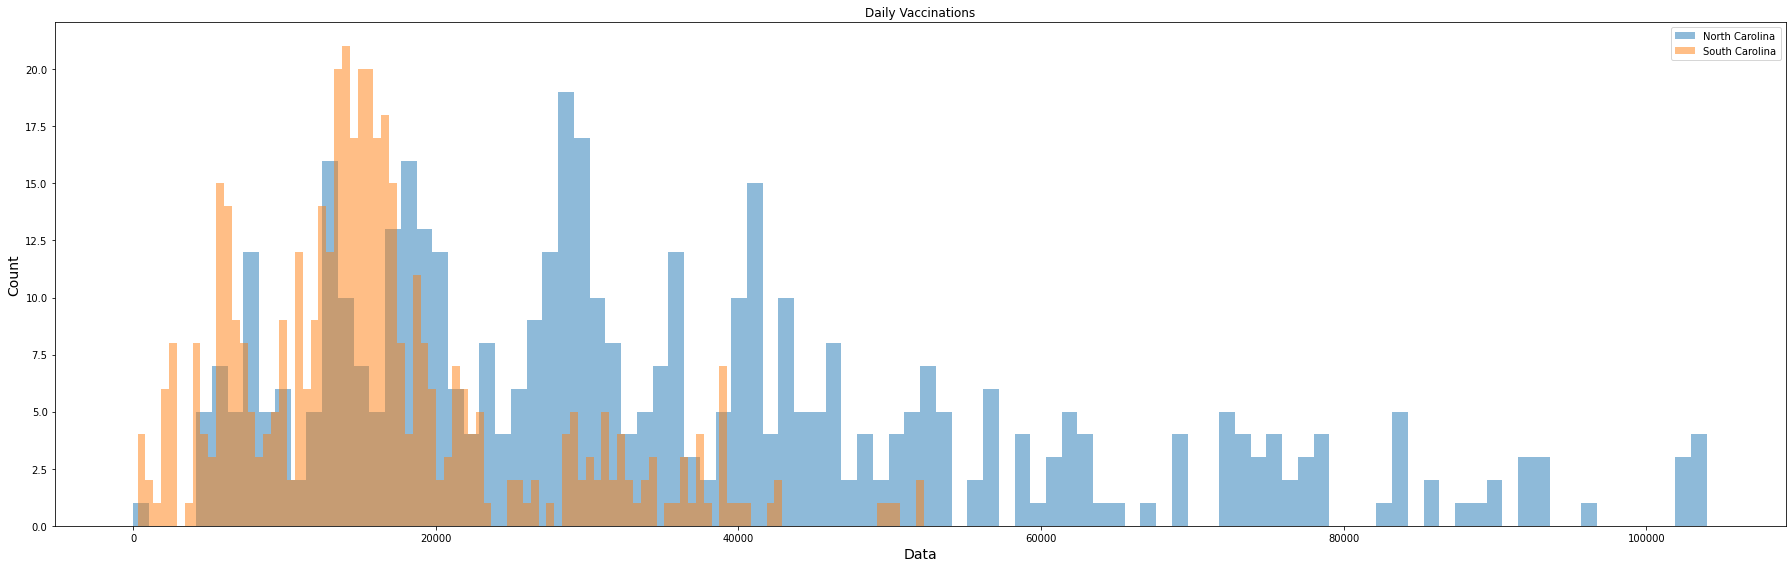

In [54]:
plt.figure(figsize=(25,8))
plt.hist(nc_daily_vac, bins=100, alpha=0.5, label="North Carolina")
plt.hist(sc_daily_vac, bins=100, alpha=0.5, label="South Carolina")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Daily Vaccinations")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/vaccine/nc_vs_sc_vaccine.pdf')
plt.show